/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:293: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:297: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:301: MatplotlibDeprecationWarning: Adding an axes using the same argum

Text(0.5, 1.0, 'Thermal Image')

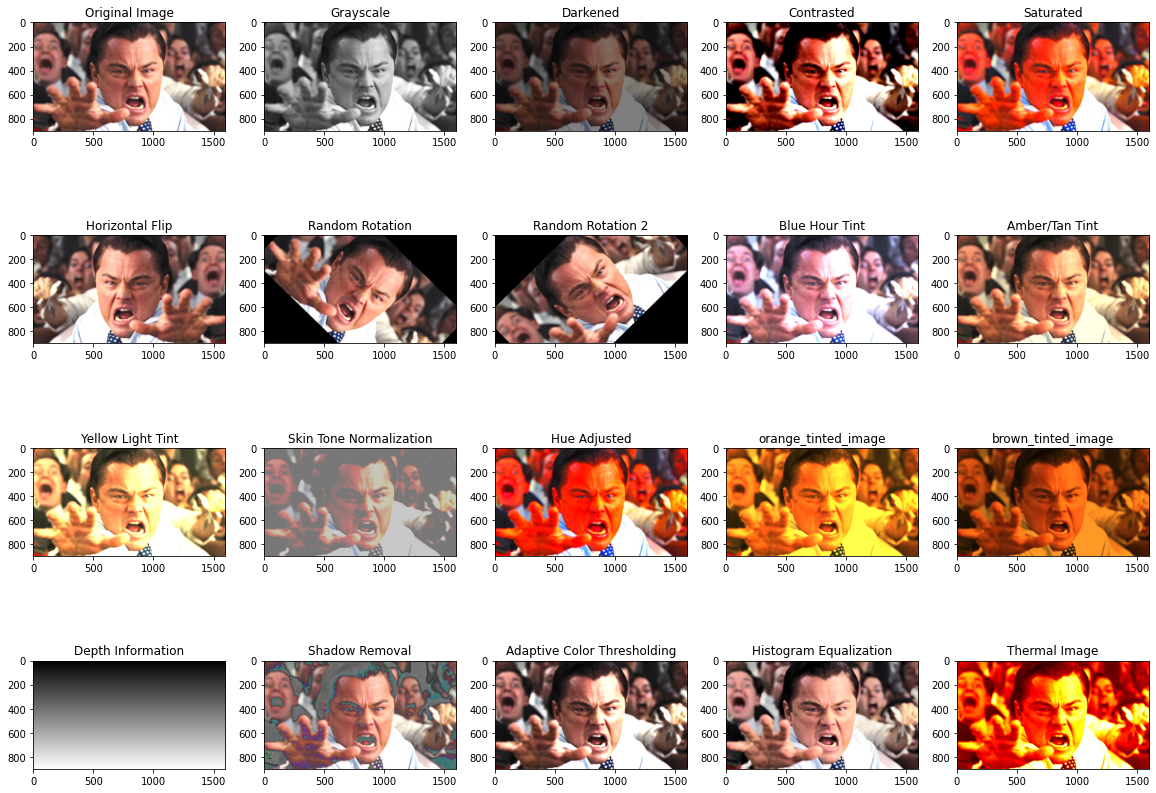

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import random
from scipy.ndimage import gaussian_filter
from scipy.ndimage import map_coordinates

def apply_grayscale(image_array):
    original_image = Image.fromarray((image_array * 255).astype(np.uint8))
    grayscale_image = original_image.convert("L").convert("RGB")
    return np.array(grayscale_image) / 255.0

def apply_darken(image_array, factor=0.5):
    image = Image.fromarray((image_array * 255).astype(np.uint8))
    enhancer = ImageEnhance.Brightness(image)
    darkened_image = enhancer.enhance(factor)
    return np.array(darkened_image) / 255.0

def apply_contrast(image_array, factor=2.0):
    image = Image.fromarray((image_array * 255).astype(np.uint8))
    enhancer = ImageEnhance.Contrast(image)
    contrasted_image = enhancer.enhance(factor)
    return np.array(contrasted_image) / 255.0

def apply_saturation(image_array, factor=3):
    image = Image.fromarray((image_array * 255).astype(np.uint8))
    enhancer = ImageEnhance.Color(image)
    saturated_image = enhancer.enhance(factor)
    return np.array(saturated_image) / 255.0

def apply_horizontal_flip(image_array):
    original_image = Image.fromarray((image_array * 255).astype(np.uint8))
    flipped_image = original_image.transpose(Image.FLIP_LEFT_RIGHT)
    return np.array(flipped_image) / 255.0

def random_rotation(image_array):
    original_image = Image.fromarray((image_array * 255).astype(np.uint8))
    angle = random.uniform(-50, -25)
    rotated_image = original_image.rotate(angle)
    return np.array(rotated_image) / 255.0

def random_rotation2(image_array):
    original_image = Image.fromarray((image_array * 255).astype(np.uint8))
    angle = random.uniform(25, 50)
    rotated_image = original_image.rotate(angle)
    return np.array(rotated_image) / 255.0

def apply_gaussian_blur(image_array, sigma=6.0):
    image = Image.fromarray((image_array * 255).astype(np.uint8))
    blurred_image = image.filter(ImageFilter.GaussianBlur(radius=sigma))
    return np.array(blurred_image) / 255.0

def apply_random_brightness(image_array, min_factor=-0.55, max_factor=1.3):
    image = Image.fromarray((image_array * 255).astype(np.uint8))
    factor = random.uniform(min_factor, max_factor)
    enhancer = ImageEnhance.Brightness(image)
    brightened_image = enhancer.enhance(factor)
    return np.array(brightened_image) / 255.0

def apply_hue_adjustment(image_array, factor=4):
    image = Image.fromarray((image_array * 255).astype(np.uint8))
    enhancer = ImageEnhance.Color(image)
    hue_adjusted_image = enhancer.enhance(factor)
    return np.array(hue_adjusted_image) / 255.0

def apply_random_channel_shift(image_array, shift_range=1):
    channels_shift = np.random.randint(-shift_range, shift_range, size=image_array.shape)
    shifted_image = image_array + channels_shift
    shifted_image = np.clip(shifted_image, 0, 1)
    return shifted_image

def apply_sharpness(image_array, factor=5.0):
    image = Image.fromarray((image_array * 255).astype(np.uint8))
    enhancer = ImageEnhance.Sharpness(image)
    sharpened_image = enhancer.enhance(factor)
    return np.array(sharpened_image) / 255.0

def apply_elastic_distortion(image_array, alpha=200, sigma=100):
    random_state = np.random.RandomState(None)

    shape = image_array.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0.1) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0.1) * alpha

    dz = np.zeros_like(dx)

    x, y, z = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]), np.arange(shape[2]))
    indices = np.reshape(y + dy, (-1, 1)), np.reshape(x + dx, (-1, 1)), np.reshape(z + dz, (-1, 1))

    distorted_image = map_coordinates(image_array, indices, order=1, mode='reflect')
    distorted_image = distorted_image.reshape(image_array.shape)

    return distorted_image

def apply_amber_tan(image_array):
    amber_tan_tint = np.array([1.2, 1.1, 0.9])  
    amber_tan_image = image_array * amber_tan_tint
    return np.clip(amber_tan_image, 0, 1)


def apply_skin_tone_normalization(image_array):
    skin_tone_range = [120, 200]
    normalized_image = np.clip(image_array, skin_tone_range[0]/255.0, skin_tone_range[1]/255.0)
    return normalized_image


def apply_shadow_removal(image_array):
    shadow_mask = image_array < 0.2
    brightened_image = image_array + (shadow_mask * 0.3)
    return np.clip(brightened_image, 0, 1)

def apply_adaptive_color_thresholding(image_array):
    intensity = np.mean(image_array, axis=-1, keepdims=True)
    thresholded_image = image_array * (intensity + 0.5)
    return np.clip(thresholded_image, 0, 1)

def apply_histogram_equalization(image_array):
    img_uint8 = (image_array * 255).astype(np.uint8)
    img_yuv = cv2.cvtColor(img_uint8, cv2.COLOR_RGB2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    equalized_image_uint8 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    
    return equalized_image_uint8 / 255.0

def apply_nir(image_array):
    nir_image = image_array[:, :, 1]
    return np.stack([nir_image, nir_image, nir_image], axis=-1)

def apply_ir(image_array):
    ir_image = image_array[:, :, 0]
    return np.stack([ir_image, ir_image, ir_image], axis=-1)

def apply_depth_information(image_array):
    depth_map = np.linspace(0, 1, image_array.shape[0])[:, np.newaxis, np.newaxis]
    depth_image = depth_map * np.ones_like(image_array)
    return depth_image
def apply_thermal(image_array):
    image_array_uint8 = (image_array * 255).astype(np.uint8)
    grayscale_image = cv2.cvtColor(image_array_uint8, cv2.COLOR_RGB2GRAY)
    thermal_colormap = plt.get_cmap('hot')
    thermal_image = thermal_colormap(grayscale_image)
    thermal_image_rgb = cv2.cvtColor((thermal_image[:, :, :3] * 255).astype(np.uint8), cv2.COLOR_RGBA2RGB)
    return thermal_image_rgb / 255.0

#custom augmentations
def apply_color_tint(image, tint_values, intensity=1.5):
    if isinstance(image, np.ndarray):
        image = Image.fromarray((image * 255).astype(np.uint8))
    
    r, g, b = image.split()
    r = r.point(lambda i: i * tint_values[0] * intensity)
    g = g.point(lambda i: i * tint_values[1] * intensity)
    b = b.point(lambda i: i * tint_values[2] * intensity)
    return Image.merge("RGB", (r, g, b))

def apply_yellow_light(image):
    yellow_light_tint = (1.2, 1.2, 0.8)
    return apply_color_tint(image, yellow_light_tint)

def apply_orange_tint(image):
    orange_tint = (1.2, 0.8, 0.2)
    return apply_color_tint(image, orange_tint)

def apply_brown_tint(image):
    brown_tint = (0.7, 0.4, 0.1)
    return apply_color_tint(image, brown_tint)

def apply_blue_hour(image_array):
    blue_hour_tint = (0.9, 0.95, 1.2)
    image = Image.fromarray((image_array * 255).astype(np.uint8))
    return apply_color_tint(image, blue_hour_tint)

def apply_histogram_equalization(image_array):
    img_uint8 = (image_array * 255).astype(np.uint8)
    img_yuv = cv2.cvtColor(img_uint8, cv2.COLOR_RGB2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    equalized_image_uint8 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return equalized_image_uint8 / 255.0

# Load the image
image_path = "image path: leo_wolf.jpg"
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
original_image = original_image / 255.0

# Apply the new augmentations
grayscale_image = apply_grayscale(original_image)
darkened_image = apply_darken(original_image)
contrasted_image = apply_contrast(original_image)
saturated_image = apply_saturation(original_image)
flipped_image = apply_horizontal_flip(original_image)
rotated_image = random_rotation(original_image)
rotated_image2 = random_rotation2(original_image)
blurred_image = apply_gaussian_blur(original_image)
brightened_image = apply_random_brightness(original_image)
hue_adjusted_image = apply_hue_adjustment(original_image)
channel_shifted_image = apply_random_channel_shift(original_image)
sharpened_image = apply_sharpness(original_image)
elastic_distorted_image = apply_elastic_distortion(original_image)
blue_hour_image = apply_blue_hour(original_image)
amber_tan_image = apply_amber_tan(original_image)
yellow_light_image = apply_yellow_light(original_image)
skin_normalized_image = apply_skin_tone_normalization(original_image)
shadow_removed_image = apply_shadow_removal(original_image)
adaptive_threshold_image = apply_adaptive_color_thresholding(original_image)
histogram_equalized_image = apply_histogram_equalization(original_image)
nir_image = apply_nir(original_image)
ir_image = apply_ir(original_image)
depth_image = apply_depth_information(original_image)
thermal_image = apply_thermal(original_image)
orange_tinted_image = apply_orange_tint(original_image)
brown_tinted_image = apply_brown_tint(original_image)

plt.figure(figsize=(20, 15))
# Original images
plt.subplot(4, 5, 1)
plt.imshow(original_image)
plt.title('Original Image')

plt.subplot(4, 5, 2)
plt.imshow(grayscale_image)
plt.title('Grayscale')

plt.subplot(4, 5, 3)
plt.imshow(darkened_image)
plt.title('Darkened')

plt.subplot(4, 5, 4)
plt.imshow(contrasted_image)
plt.title('Contrasted')

plt.subplot(4, 5, 5)
plt.imshow(saturated_image)
plt.title('Saturated')

plt.subplot(4, 5, 6)
plt.imshow(flipped_image)
plt.title('Horizontal Flip')

plt.subplot(4, 5, 7)
plt.imshow(rotated_image)
plt.title('Random Rotation')

plt.subplot(4, 5, 8)
plt.imshow(rotated_image2)
plt.title('Random Rotation 2')

plt.subplot(4, 5, 13)
plt.imshow(hue_adjusted_image)
plt.title('Hue Adjusted')

plt.subplot(4, 5, 14)
plt.imshow(channel_shifted_image)
plt.title('Channel Shifted')

plt.subplot(4, 5, 15)
plt.imshow(sharpened_image)
plt.title('Sharpened')

plt.subplot(4, 5, 16)
plt.imshow(elastic_distorted_image)
plt.title('Elastic Distortion')

plt.subplot(4, 5, 9)
plt.imshow(blue_hour_image)
plt.title('Blue Hour Tint')

plt.subplot(4, 5, 10)
plt.imshow(amber_tan_image)
plt.title('Amber/Tan Tint')

plt.subplot(4, 5, 11)
plt.imshow(yellow_light_image)
plt.title('Yellow Light Tint')

plt.subplot(4, 5, 12)
plt.imshow(skin_normalized_image)
plt.title('Skin Tone Normalization')

plt.subplot(4, 5, 17)
plt.imshow(shadow_removed_image)
plt.title('Shadow Removal')

plt.subplot(4, 5, 18)
plt.imshow(adaptive_threshold_image)
plt.title('Adaptive Color Thresholding')

plt.subplot(4, 5, 19)
plt.imshow(histogram_equalized_image)
plt.title('Histogram Equalization')

plt.subplot(4, 5, 14)
plt.imshow(orange_tinted_image)
plt.title('orange_tinted_image')

plt.subplot(4, 5, 15)
plt.imshow(brown_tinted_image)
plt.title('brown_tinted_image')

plt.subplot(4, 5, 16)
plt.imshow(depth_image)
plt.title('Depth Information')

plt.subplot(4, 5, 20)
plt.imshow(thermal_image)
plt.title('Thermal Image')